# 1. Miscellaneous techniques

## 1.1. Mapping
Map is the generalization of function.

In [1]:
import numpy as np
import pandas as pd

In [15]:
student = pd.DataFrame({
    'student_id': ['010001', '030001', '070001', '080001', '110001', '120001'],
    'gender': ['Male', 'Female', 'Female', 'Female', 'Male', 'Female']
})
student

,student_id,gender
0,010001,Male
1,030001,Female
2,070001,Female
3,080001,Female
4,110001,Male
5,120001,Female


#### Mapping with a dictionary

In [6]:
gender_map = {'Female': 0, 'Male': 1}
student.gender.map(gender_map)

0    1
1    0
2    0
3    0
4    1
5    0
Name: gender, dtype: int64

#### Mapping with a function

In [16]:
student['grade'] = student.student_id.map(lambda x: int(x[:2]))
student

,student_id,gender,grade
0,010001,Male,1
1,030001,Female,3
2,070001,Female,7
3,080001,Female,8
4,110001,Male,11
5,120001,Female,12


In [17]:
def stage_map(grade):
    if grade in range(1, 6):
        stage = 'Primary'
    if grade in range(6, 10):
        stage = 'Secondary'
    if grade in range(10, 13):
        stage = 'High'
    return stage

student['stage'] = student.grade.map(stage_map)
student

,student_id,gender,grade,stage
0,010001,Male,1,Primary
1,030001,Female,3,Primary
2,070001,Female,7,Secondary
3,080001,Female,8,Secondary
4,110001,Male,11,High
5,120001,Female,12,High


## 1.2. Window functions

In [2]:
import pandas as pd
import numpy as np

In [5]:
cars = pd.read_excel(r'data\cars.xlsx')
cars.head()

,manufacturer,model,type,min_price,price,max_price,mpg_city,mpg_highway,airbags,drive_train,...,passengers,length,wheelbase,width,turn_circle,rear_seat_room,luggage_room,weight,origin,make
0,Chevrolet,Cavalier,Compact,8.5,13.4,18.3,25,36,None,Front,...,5,182,101,66,38,25.0,13.0,2490,USA,Chevrolet Cavalier
1,Chevrolet,Corsica,Compact,11.4,11.4,11.4,25,34,Driver only,Front,...,5,184,103,68,39,26.0,14.0,2785,USA,Chevrolet Corsica
2,Chevrolet,Camaro,Sporty,13.4,15.1,16.8,19,28,Driver & Passenger,Rear,...,4,193,101,74,43,25.0,13.0,3240,USA,Chevrolet Camaro
3,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,...,6,198,108,71,40,28.5,16.0,3195,USA,Chevrolet Lumina
4,Chevrolet,Lumina_APV,Van,14.7,16.3,18.0,18,23,None,Front,...,7,178,110,74,44,30.5,NaN,3715,USA,Chevrolet Lumina_APV


In [41]:
cars[['manufacturer', 'price']]\
    .assign(rank=cars.groupby('manufacturer').price.rank().astype(int))\
    .assign(dense_rank=cars.groupby('manufacturer').price.rank(method='dense').astype(int))\
    .assign(row_number=cars.groupby('manufacturer').price.rank(method='first').astype(int))\
    .sort_values(['manufacturer', 'price'])\
    .loc[cars.manufacturer=='Hyundai']

,manufacturer,price,rank,dense_rank,row_number
21,Hyundai,8.0,1,1,1
24,Hyundai,10.0,2,2,2
25,Hyundai,10.0,2,2,3
26,Hyundai,13.9,4,3,4
23,Hyundai,16.1,5,4,5
22,Hyundai,18.8,6,5,6


## 1.3. Mathematical transformation
Sometimes real world data distribute not very nice, while most transformation techiniques do not affect the distribution. Imagine the label in a regression problem is mostly small values, then Machine Learning algorithms will have a hard time *learning* higher values. By taking advantage of mathematical functions, Data Scientists can control the distribution of data to make them more *nature*.

This section covers the most notable transformations. Some other basic and popular ones are:
- *Reciprocal* transformation: $\mathbf{x}=\mathbf{x}^{-1}$
- *Square root* transformation: $\mathbf{x}=\sqrt{\mathbf{x}}$
- *Exponential* transformation: $\mathbf{x}=e^{\mathbf{x}}$

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import skewnorm, boxcox, yeojohnson
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-deep')
sns.set_style('whitegrid')

#### Logarithmic transformation
This popular technique has the ability to make right skewed data to distribute normally. The formula of the transformation is:

$$\mathbf{x}\leftarrow\log_b{(\mathbf{x}+1)}$$

Some notable tips when using log transformation:
- It works only on features contain all postive values.
- Different base values $b$ can be used, the most common ones are: $e$, $2$ and $10$.
- The quantity $1$ is added to $\mathbf{x}$ to make sure the values after the transformation are all positive, since $\log{(x+1)}>\log1=0$.

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import skewnorm
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-deep')
sns.set_style('whitegrid')

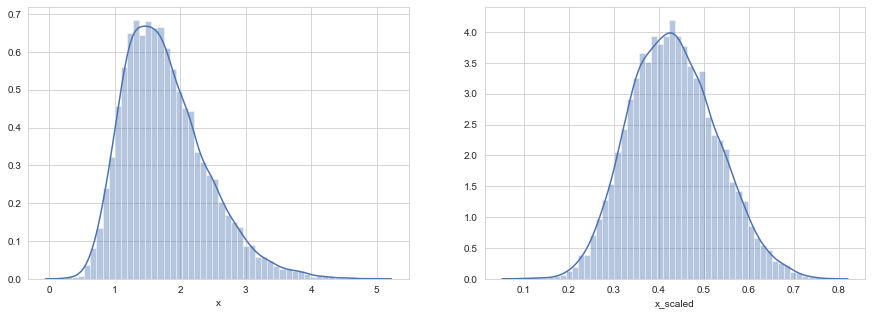

In [3]:
df = pd.DataFrame({'x': skewnorm.rvs(a=4, loc=1, size=10000)})
df = df.assign(x_scaled=np.log10(df.x+1))

fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.distplot(df.x, ax=ax[0])
sns.distplot(df.x_scaled, ax=ax[1])
plt.show()

#### Box-Cox transformation
Box-Cox function is a member of power functions family. It has the effect of making data more normal distribution-like. The transformation is given by:

$$\mathbf{x}\leftarrow
\begin{cases}
    {\dfrac {\mathbf{x}^{\lambda}-1}{\lambda}}&{\text{if }}\lambda\neq 0\\
    \ln\mathbf{x}&{\text{if }}\lambda=0
\end{cases}
$$

In [3]:
boxcox(df.x)

(array([0.33677091, 0.66409469, 1.06438417, ..., 0.40293505, 0.39759809,
        0.59359505]),
 0.14806140788656114)

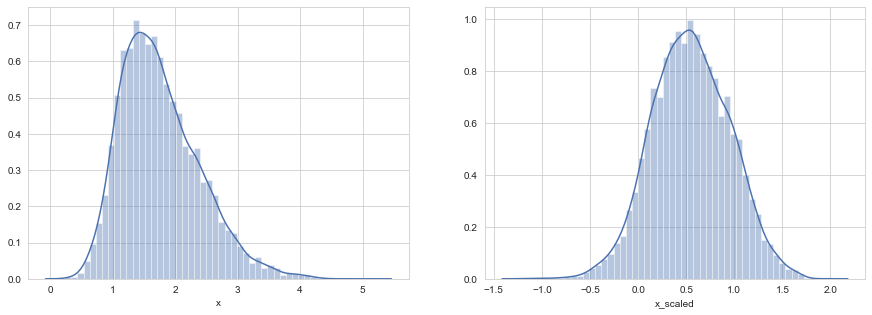

In [6]:
df = pd.DataFrame({'x': skewnorm.rvs(a=4, loc=1, size=10000)})
df = df.assign(x_scaled=boxcox(df.x)[0])

fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.distplot(df.x, ax=ax[0])
sns.distplot(df.x_scaled, ax=ax[1])
plt.show()

In [7]:
x = np.array([1, 2, 3, 4])
boxcox(x)

(array([0.        , 0.87906495, 1.61395204, 2.26850639]), 0.660463361413373)

In [1]:
x = 2
ld = 0.660463

(x**ld - 1)/ld

0.8790648325641579

#### Yeo-Johnson transformation

# 2. Pivot table

## 2.1. Wide and long form

#### Wide form table
Wide form table divides a variable and place each part in a column. Therefore, it allows displaying more data, and is convenient for keeping tract of exactly one index (sales or profit for example). However, wide form supports not very well storing two variables ore more.

Color|2000 Q1|2000 Q2|2000 Q3|2000 Q4|
:----|------:|------:|------:|------:|
Red  |\$ 1000|\$ 1200|\$ 1500|\$ 1700|
Green|\$ 1500|\$ 1500|\$ 1575|\$ 1800|
Blue |\$ 2000|\$ 2200|\$ 2000|\$ 2800|

#### Long form table
Long form stores each variable in only one column, allowing you to have unlimited number of features. In data analysis, long form is considered tidy data and is used as standard tabular data format.

Color|Quarter|Sales   |Quantity|Price|
:----|:------|-------:|-------:|----:|
Red  |2000 Q1|\$ 1000 |50      |\$ 20|
Green|2000 Q1|\$ 1500 |50      |\$ 30|
Blue |2000 Q1|\$ 2000 |40      |\$ 50|
Red  |2000 Q2|\$ 1200 |60      |\$ 20|
Green|2000 Q2|\$ 1500 |50      |\$ 30|
Blue |2000 Q2|\$ 2200 |40      |\$ 55|
Red  |2000 Q3|\$ 1500 |75      |\$ 20|
Green|2000 Q3|\$ 1575 |45      |\$ 35|
Blue |2000 Q3|\$ 2000 |40      |\$ 50|
Red  |2000 Q4|\$ 1700 |85      |\$ 20|
Green|2000 Q4|\$ 1800 |20      |\$ 60|
Blue |2000 Q4|\$ 2800 |70      |\$ 40|

## 2.2. Unpivoting
Unpivoting is the process of transforming a table from wide form to long form. This technique is very useful in tidying up messy data.

In [35]:
import pandas as pd
import numpy as np

In [10]:
z_score = pd.read_excel(r'data\z_score.xlsx')
z_score.head()

,z,0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0,3.9,0.00005,0.00005,0.00004,0.00004,0.00004,0.00004,0.00004,0.00004,0.00003,0.00003
1,3.8,0.00007,0.00007,0.00007,0.00006,0.00006,0.00006,0.00006,0.00005,0.00005,0.00005
2,3.7,0.00011,0.00010,0.00010,0.00010,0.00009,0.00009,0.00008,0.00008,0.00008,0.00008
3,3.6,0.00016,0.00015,0.00015,0.00014,0.00014,0.00013,0.00013,0.00012,0.00012,0.00011
4,3.5,0.00023,0.00022,0.00022,0.00021,0.00020,0.00019,0.00019,0.00018,0.00017,0.00017


In [11]:
z_score = z_score.melt(id_vars='z', var_name='z2', value_name='right_area')
z_score.head()

,z,z2,right_area
0,3.9,0,0.00005
1,3.8,0,0.00007
2,3.7,0,0.00011
3,3.6,0,0.00016
4,3.5,0,0.00023


In [14]:
z_score['z_score'] = z_score.z + z_score.z2
z_score = z_score[['z_score', 'right_area']]
z_score

,z_score,right_area
0,3.9,0.00005
1,3.8,0.00007
2,3.7,0.00011
3,3.6,0.00016
4,3.5,0.00023
...,...,...
395,0.49,0.31207
396,0.39,0.34827
397,0.29,0.38591
398,0.19,0.42465


## 2.3. Pivot table
Pivoting is the process of transforming a table from long form to wide form. Notice that your table is already tidy, so pivot table mainly works as a tool to summarise your data.

In [1]:
import pandas as pd
import numpy as np

In [2]:
long = pd.DataFrame({
    'Market': ['Asian', 'Asian', 'Asian', 'Asian', 'Europe', 'Europe', 'Europe', 'Europe'],
    'Color': ['Red', 'Red', 'Blue', 'Blue', 'Red', 'Red', 'Blue', 'Blue'],
    'Size': ['Large', 'Small', 'Large', 'Small','Large', 'Small', 'Large', 'Small'],
    'Price': [17, 11, 19, 13, 18, 12, 20, 14],
    'Sales': [68000, 44000, 57000, 52000, 81000, 72000, 90000, 77000]
})
long

,Market,Color,Size,Price,Sales
0,Asian,Red,Large,17,68000
1,Asian,Red,Small,11,44000
2,Asian,Blue,Large,19,57000
3,Asian,Blue,Small,13,52000
4,Europe,Red,Large,18,81000
5,Europe,Red,Small,12,72000
6,Europe,Blue,Large,20,90000
7,Europe,Blue,Small,14,77000


#### Basic pivoting
Pivoting usually returns duplicated values, handling them requires an aggregate function. The default function used in the `pivot_table()` method is `np.mean`. In this example, we should use `np.sum` for `Sales` and `np.mean` for `Price`.

In [5]:
long\
    .pivot_table(
        index=['Market', 'Color'],
        columns='Size',
        values='Sales',
        aggfunc=np.sum)\
    .reset_index()\
    .rename_axis(None, axis=1)

,Market,Color,Large,Small
0,Asian,Blue,1,1
1,Asian,Red,1,1
2,Europe,Blue,1,1
3,Europe,Red,1,1


In [32]:
long\
    .pivot_table(
        index=['Market', 'Color'],
        columns='Size',
        values='Price',
        aggfunc=np.mean)\
    .reset_index()\
    .rename_axis(None, axis=1)

,Market,Color,Large,Small
0,Asian,Blue,19,13
1,Asian,Red,17,11
2,Europe,Blue,20,14
3,Europe,Red,18,12


#### Multivariable pivoting
The more advanced the technique, the more complicated the tools are.

In [33]:
wide = long.pivot_table(
    index='Market',
    columns='Color',
    aggfunc={'Price': np.mean, 'Sales': np.sum}
)
wide

Price       Sales        
Color   Blue Red    Blue     Red
Market                          
Asian     16  14  109000  112000
Europe    17  15  167000  153000

**Note:** By using passing a dictionary to the `aggfunc` parameter, we have specified the columns to be used as values. Therefore, the `values` parameter can be skipped.

In [34]:
wide.columns = wide.columns.ravel()
wide = wide.reset_index()
wide

,Market,"(Price, Blue)","(Price, Red)","(Sales, Blue)","(Sales, Red)"
0,Asian,16,14,109000,112000
1,Europe,17,15,167000,153000


#### Pivoting vs. Grouping
Skipping the `columns` parameter ends up returning them same result as the `groupby()` method.

In [3]:
long\
    .pivot_table(
        index=['Market', 'Color'],
        aggfunc={'Price': np.mean, 'Sales': np.sum})\
    .reset_index()

,Market,Color,Price,Sales
0,Asian,Blue,16,109000
1,Asian,Red,14,112000
2,Europe,Blue,17,167000
3,Europe,Red,15,153000


In [4]:
long\
    .groupby(['Market', 'Color'])\
    .agg({'Price': np.mean, 'Sales': np.sum})\
    .reset_index()

,Market,Color,Price,Sales
0,Asian,Blue,16,109000
1,Asian,Red,14,112000
2,Europe,Blue,17,167000
3,Europe,Red,15,153000


# 3. Combining datasets

## 3.1. Appending
Appending is the process of concatenating data along the vertical axis (axis 0). This adds more observations to your current dataset.

#### Appending a table with another
The Pandas `append()` method is equivalent to the `UNION ALL` statement in SQL. Notice that the data to be appended bases on columns of the same name. Therefore, you should select only neccessary columns and standardize their names.

In [1]:
import numpy as np
import pandas as pd

In [2]:
sales1 = pd.DataFrame({
    'year': [2000, 2000, 2000, 2000],
    'quarter': [1, 2, 3, 4],
    'target': [40000, 50000, 70000, 85000],
    'sales': [35000, 38000, 78000, 90000]
})
sales1

,year,quarter,target,sales
0,2000,1,40000,35000
1,2000,2,50000,38000
2,2000,3,70000,78000
3,2000,4,85000,90000


In [3]:
sales2 = pd.DataFrame({
    'year': [2001, 2001, 2001, 2001],
    'quarter': [1, 2, 3, 4],
    'target': [50000, 60000, 70000, 85000],
    'sales': [60000, 65000, 82000, 94000],
    'profit': [20000, 21000, 27000, 35000]
})
sales2

,year,quarter,target,sales,profit
0,2001,1,50000,60000,20000
1,2001,2,60000,65000,21000
2,2001,3,70000,82000,27000
3,2001,4,85000,94000,35000


In [61]:
sales1.append(sales2[['year', 'quarter', 'target', 'sales']])

,year,quarter,target,sales
0,2000,1,40000,35000
1,2000,2,50000,38000
2,2000,3,70000,78000
3,2000,4,85000,90000
0,2001,1,50000,60000
1,2001,2,60000,65000
2,2001,3,70000,82000
3,2001,4,85000,94000


#### Concatenating multiple tables
Since the current table and the table to be appended are equally treated, you can concatenate multiple tables at once. These tables should have the same format.

In [5]:
file = pd.ExcelFile(r'data\world_population.xlsx')
file.sheet_names

['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']

In [21]:
pd.concat(file.parse(i) for i in file.sheet_names)\
    .astype({'population': int})\
    .reset_index()

,index,year,country,population
0,0,1960,Afghanistan,8996351
1,1,1961,Afghanistan,9166764
2,2,1962,Afghanistan,9345868
3,3,1963,Afghanistan,9533954
4,4,1964,Afghanistan,9731361
...,...,...,...,...
12258,1509,2012,Zimbabwe,14710826
12259,1510,2013,Zimbabwe,15054506
12260,1511,2014,Zimbabwe,15411675
12261,1512,2015,Zimbabwe,15777451


## 3.2. Merging
Merging is the process of concatenating data along the horizontal axis (axis 1). This adds more variables to your current dataset. The Pandas `merge()` method is equivalent to the `JOIN` statement in SQL.

The `merge()` method uses common columns to merge on, this explains why you should rename columns before merging. Unlike `append()`, `merge()` treats the two tables not equally, therefore we have 4 types of merge: left, right, inner and outer; indicating which keys to be used.

In [64]:
import numpy as np
import pandas as pd

In [22]:
income = pd.DataFrame({
    'name': ['Hannah', 'James', 'Gabriel', 'Smith', 'Alex'],
    'income_before_tax': [12000, 30000, 7000, 20000, 100000],
    'tax_band': ['Allowance', 'Basic', 'Allowance', 'Basic', 'Higher']
})
income

,name,income_before_tax,tax_band
0,Hannah,12000,Allowance
1,James,30000,Basic
2,Gabriel,7000,Allowance
3,Smith,20000,Basic
4,Alex,100000,Higher


In [23]:
tax = pd.DataFrame({
    'band': ['Allowance', 'Basic', 'Higher', 'Additional'],
    'income_range': ['Up to $12,500', '\$12,501 to $50,000', '\$50,001 to $150,000', 'Over $150,000'],
    'tax_rate': [0, 0.2, 0.4, 0.45]
})
tax

,band,income_range,tax_rate_%
0,Allowance,"Up to $12,500",0.00
1,Basic,"\$12,501 to $50,000",0.20
2,Higher,"\$50,001 to $150,000",0.40
3,Additional,"Over $150,000",0.45


In [69]:
income\
    .rename(columns={'tax_band': 'band'})\
    .merge(tax, how='left')

,name,income_before_tax,band,income_range,tax_rate_%
0,Hannah,12000,Allowance,"Up to $12,500",0.0
1,James,30000,Basic,"\$12,501 to $50,000",0.2
2,Gabriel,7000,Allowance,"Up to $12,500",0.0
3,Smith,20000,Basic,"\$12,501 to $50,000",0.2
4,Alex,100000,Higher,"\$50,001 to $150,000",0.4


---
*&#9829; By Quang Hung x Thuy Linh &#9829;*